In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10) # width, height in inches
 

In [2]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection._split import _BaseKFold, indexable, _num_samples
from sklearn.utils.validation import _deprecate_positional_args
from sklearn.metrics import log_loss, precision_recall_curve, average_precision_score, roc_curve, auc, roc_auc_score, confusion_matrix, classification_report, accuracy_score,r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer, Binarizer
from sklearn.pipeline import Pipeline
 

In [3]:

d1 = pd.read_csv('C:/Users/User/Desktop/Nov/30/london_weather.csv')
d1.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
d2 = d1.drop(['date','cloud_cover','sunshine','global_radiation','precipitation','pressure','snow_depth'],axis='columns')
d2.head()

,max_temp,mean_temp,min_temp
0,2.3,-4.1,-7.5
1,1.6,-2.6,-7.5
2,1.3,-2.8,-7.2
3,-0.3,-2.6,-6.5
4,5.6,-0.8,-1.4


In [5]:
df2 = d2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   max_temp   15335 non-null  float64
 1   mean_temp  15305 non-null  float64
 2   min_temp   15339 non-null  float64
dtypes: float64(3)
memory usage: 359.7 KB


<AxesSubplot: >

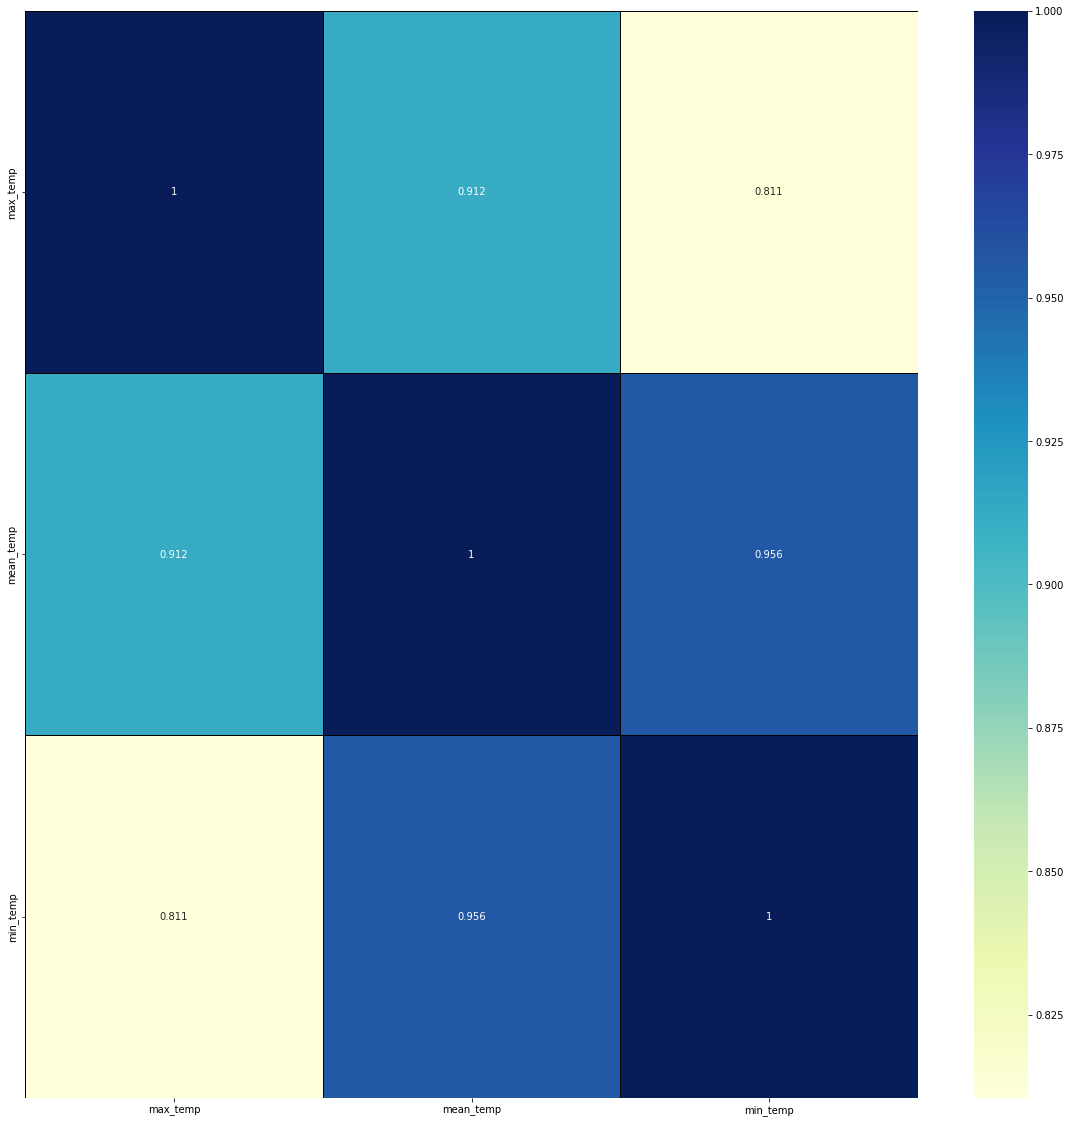

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), fmt='.3g', linecolor='black',linewidths=.5,cmap="YlGnBu" , annot=True)

In [7]:
df2.describe()

,max_temp,mean_temp,min_temp
count,15335.000000,15305.000000,15339.000000
mean,15.388777,11.475511,7.559867
std,6.554754,5.729709,5.326756
min,-6.200000,-7.600000,-11.800000
25%,10.500000,7.000000,3.500000
50%,15.000000,11.400000,7.800000
75%,20.300000,16.000000,11.800000
max,37.900000,29.000000,22.300000


In [9]:

df2.shape

(15341, 3)

In [10]:

df2.columns

Index(['max_temp', 'mean_temp', 'min_temp'], dtype='object')

In [11]:
df2.isna().sum()

max_temp      6
mean_temp    36
min_temp      2
dtype: int64

In [12]:
df2 = df2.dropna()
df2.isnull().sum()

max_temp     0
mean_temp    0
min_temp     0
dtype: int64

In [13]:
df2.head()

,max_temp,mean_temp,min_temp
0,2.3,-4.1,-7.5
1,1.6,-2.6,-7.5
2,1.3,-2.8,-7.2
3,-0.3,-2.6,-6.5
4,5.6,-0.8,-1.4


In [14]:
X = df2.drop(['mean_temp'],axis='columns')
X.head()

,max_temp,min_temp
0,2.3,-7.5
1,1.6,-7.5
2,1.3,-7.2
3,-0.3,-6.5
4,5.6,-1.4


In [15]:
len(X)

15305

In [16]:
y = df2.mean_temp
y.head()

0   -4.1
1   -2.6
2   -2.8
3   -2.6
4   -0.8
Name: mean_temp, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (12244, 2)
X_test shape =  (3061, 2)
y_train shape =  (12244,)
y_test shape =  (3061,)


In [18]:

X_train

,max_temp,min_temp
7712,9.9,3.2
4929,19.1,16.9
12173,17.6,7.7
12375,12.8,1.2
8702,11.5,8.1
...,...,...
11662,1.7,-3.1
1344,23.4,14.7
12844,8.9,1.5
7293,5.4,2.6


In [19]:
X_test

,max_temp,min_temp
3809,16.6,9.3
10614,12.7,3.5
7933,18.6,10.4
12837,14.9,6.8
463,12.0,4.0
...,...,...
8194,17.7,7.0
2346,20.4,11.2
9184,6.3,0.1
6539,6.3,3.7


In [20]:
y_test

3809     10.8
10614     8.1
7933     13.6
12837     9.7
463       7.2
         ... 
8194     11.9
2346     17.8
9184      3.0
6539      5.6
10305     4.4
Name: mean_temp, Length: 3061, dtype: float64

In [21]:
y_train

7712      6.4
4929     20.3
12173    13.5
12375     5.6
8702     11.2
         ... 
11662    -1.8
1344     16.0
12844     6.0
7293      3.9
1289     20.9
Name: mean_temp, Length: 12244, dtype: float64

In [22]:

from sklearn.ensemble import RandomForestRegressor

In [23]:
model = RandomForestRegressor()

In [24]:
model.fit(X_test, y_test)

RandomForestRegressor()

In [25]:

model.score(X_test, y_test)

0.9934598715535187

In [26]:
def predict_weather(max_temp,	min_temp):
 
  input = pd.DataFrame([[max_temp,	min_temp]], columns=['max_temp', 'min_temp'])
  prediction = model.predict(input)[0]

  return str(prediction)

In [27]:
predict_weather(20.4,	11.2)

'17.348999999999986'